# Lesson 1

## Simple Linear Regression

In [6]:
import pandas as pd
import seaborn as sns

In [2]:

df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
df = df.rename(columns=column_names)



In [4]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

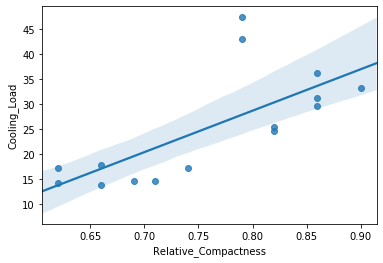

In [7]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
data=simple_linear_reg_df)

# Lesson 3

## Measuring Regression Performance
● Mean Absolute Error (MAE)

In [8]:

#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']





In [10]:
#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,test_size=0.3, random_state=1)
linear_model = LinearRegression()

In [11]:
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [12]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #prints 0.063


0.063

● Residual Sum of Squares (RSS)

In [13]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) #prints 1.823


1.817

● Root Mean Square Error (RMSE)

In [14]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) #prints 0.089


0.089

● R-Squared

In [15]:

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) #prints 0.893

0.894

# Lesson 4

Penalization Methods
● Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

● Feature Selection and Lasso Regression

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [21]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

Features Linear_Model_Weight Ridge_Weight Lasso_weight
Surface Area -208535169648.890289 -0.062275 0.000000
Relative Compactness -64.612863 -0.283471 -0.027719
Orientation -0.023080 0.003369 0.000000
Glazing Area Distribution 0.203771 0.029088 0.021431
Overall Height 4.170480 0.442467 0.463482
Glazing Area 19.931923 0.212449 0.206132
Wall Area 208535169648.863983 0.103061 0.200087
Roof_Area 417070339297.606750 -0.163192 -0.000000

In [22]:
print(final_weights)

                    Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0       Relative_Compactness            -0.606412     -0.283471     -0.027719
1                  Roof_Area            -0.328099     -0.163192     -0.000000
2               Surface_Area            -0.235022     -0.062275      0.000000
3                Orientation             0.003399      0.003369      0.000000
4                  Wall_Area             0.018947      0.103061      0.200087
5  Glazing_Area_Distribution             0.028452      0.029088      0.021431
6               Glazing_Area             0.215042      0.212449      0.206132
7             Overall_Height             0.393549      0.442467      0.463482


# Self_Practice

### Simple Linear Regression
According to the United Nations Environmental Program (UNEP) Sustainable Buildings and Climate Initiative, construction trade contributes as much as 30% to all global greenhouse gas emissions and consumes up to 40% of all energy used worldwide. Climate change is currently having a powerful impact on how buildings are designed and constructed.

Predicting numeric outcomes with some accuracy measure is an important facet of machine learning and data science. For this part, we will use a case study to understand linear regression and its associated cousins. We will learn about the assumptions behind linear regression, multiple linear regression, partial least squares and penalizations. We’ll also focus on strategies for measuring regression performance and implementations. 

In this module, we will develop a multivariate multiple regression model to study the effect of eight input variables on two output variables, which are the heating load and the cooling load, of residential buildings. The data provided is from the energy analysis data of 768 different building shapes. The features provided are the relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area and glazing area distribution. 

#### Collinearity and Assumptions for Linear Regression

1. Linearity: the relationship between the variables is linear such that a straight line is the line of best fit.
2. Homoscedasticity: the residuals or prediction errors are of equal or constant variance.
3. Normality: the residuals are of a normal distribution
4. Independence of the observations


## Measuring Regression Performance

* Mean Absolute Error (MAE)

MAE  is easy and intuitive such that it calculates the sum of the  average of the absolute error between the predicted values and the true values. Since the absolute difference is taken, this metric does not consider direction. However, because the absolute difference is obtained, it is unable to give information about the model overshooting or undershooting. The smaller the MAE is, the better the model. Therefore, if the MAE is 0, the model is perfect and accurately predicts results which is almost impossible.  The mean absolute error is more robust to outliers

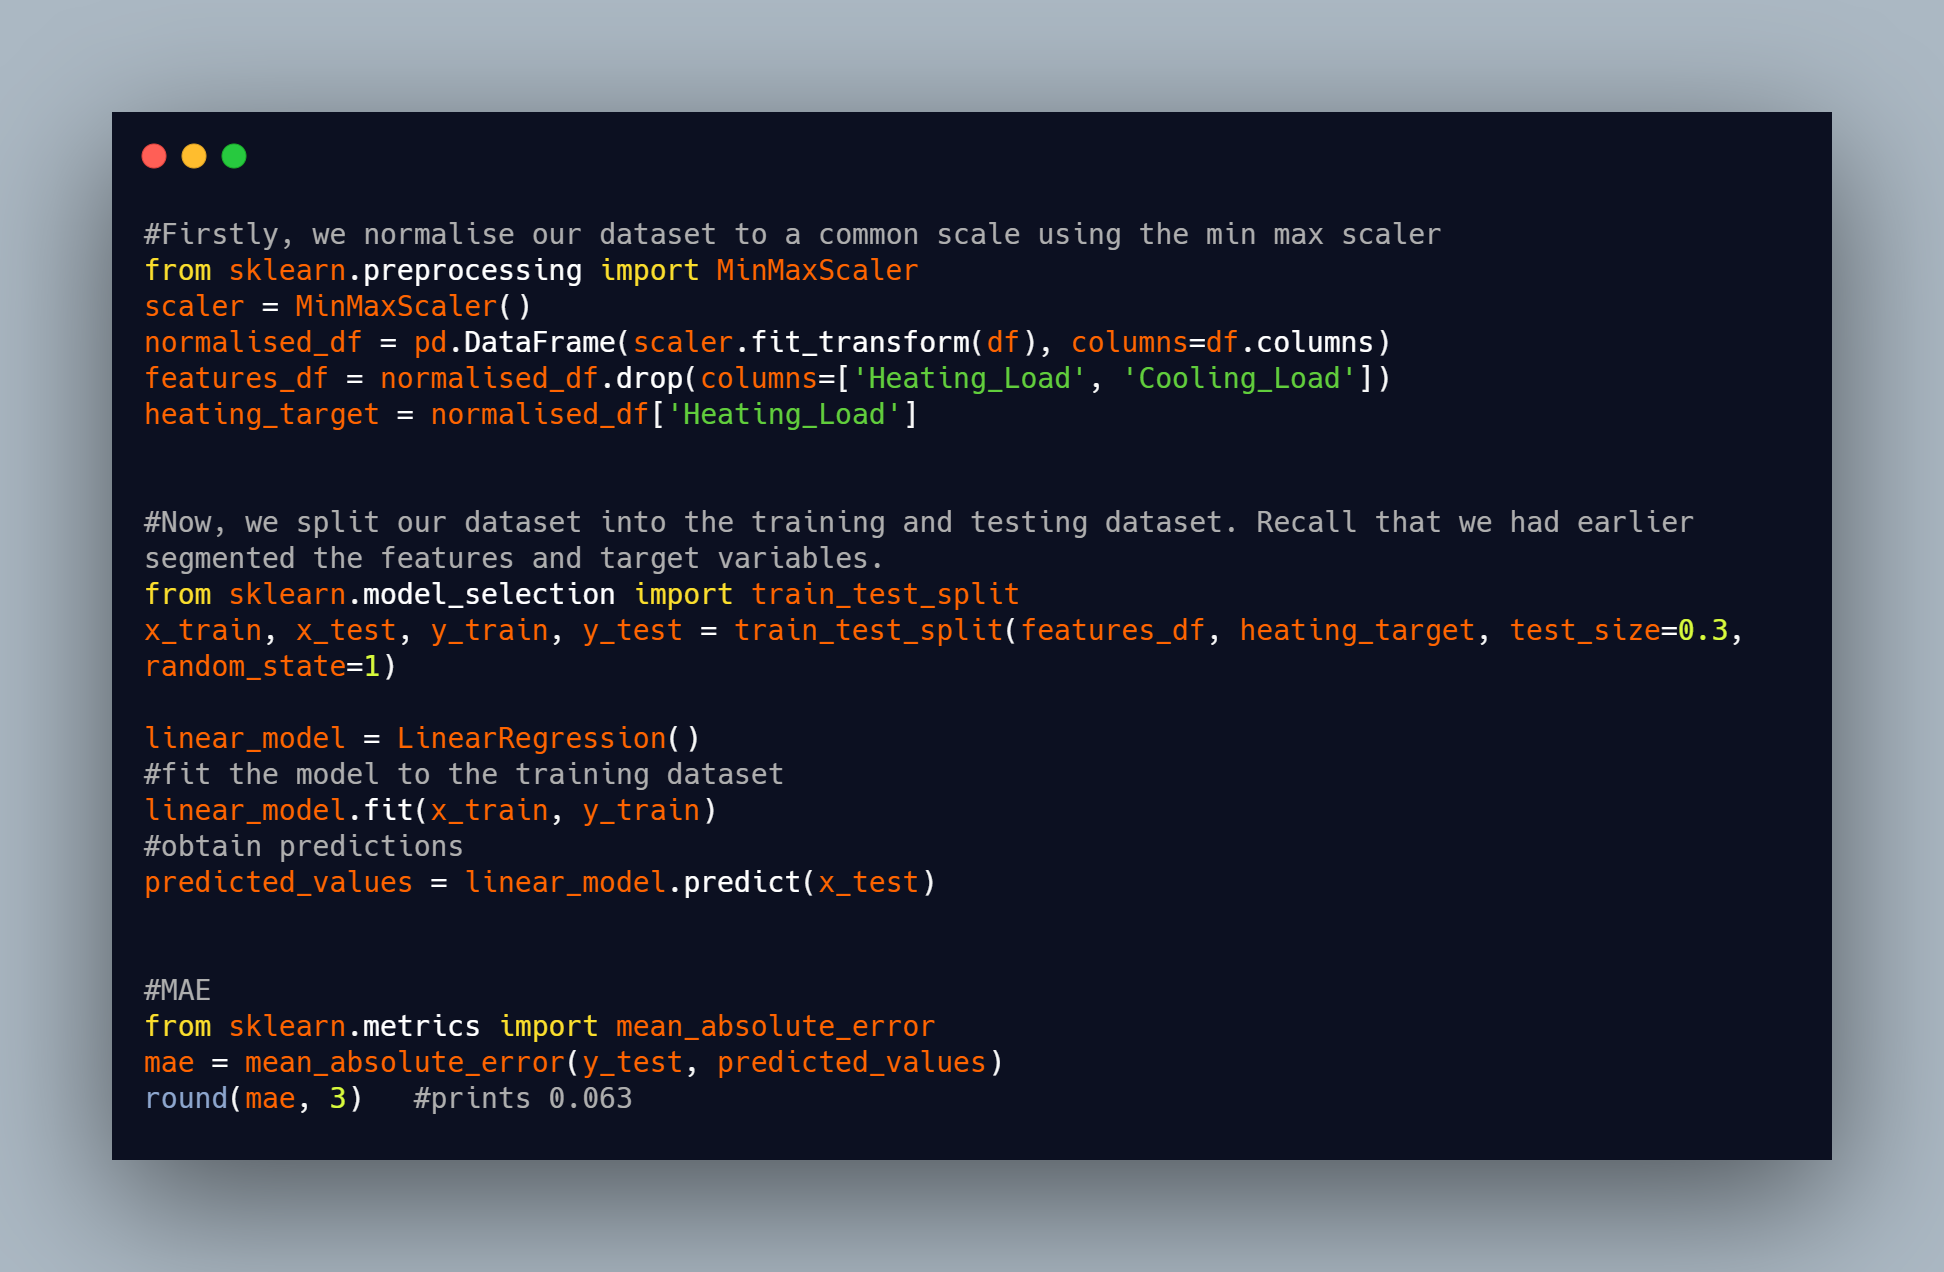

* Residual Sum of Squares (RSS)

Also known as the sum of squared residuals (SSR), this metric explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. A residual is the estimated error made by a model. In simpler terms, it is the difference between the nth true value and the nth predicted value by the model. RSS is the sum of the square of errors between the residuals in a model. The lower the RSS, the better the model’s estimations and vice versa.

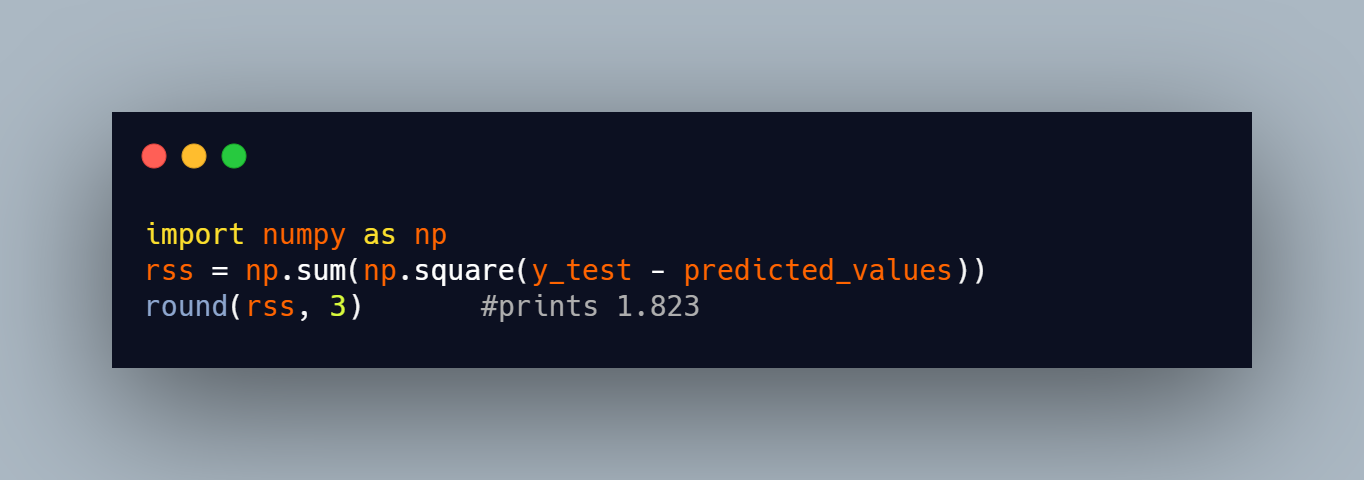

* Root Mean Square Error (RMSE)

This is the same as the mean square error (MSE) but, it is the square root of the MSE that estimates the standard deviation of the residuals. It describes the spread of the residuals from the line of best fit and the noise in the model. When the RMSE is low, it means that the error made by the model has a small deviation from the true values. It is calculated by summing the squares of the residuals and dividing by the number of observations

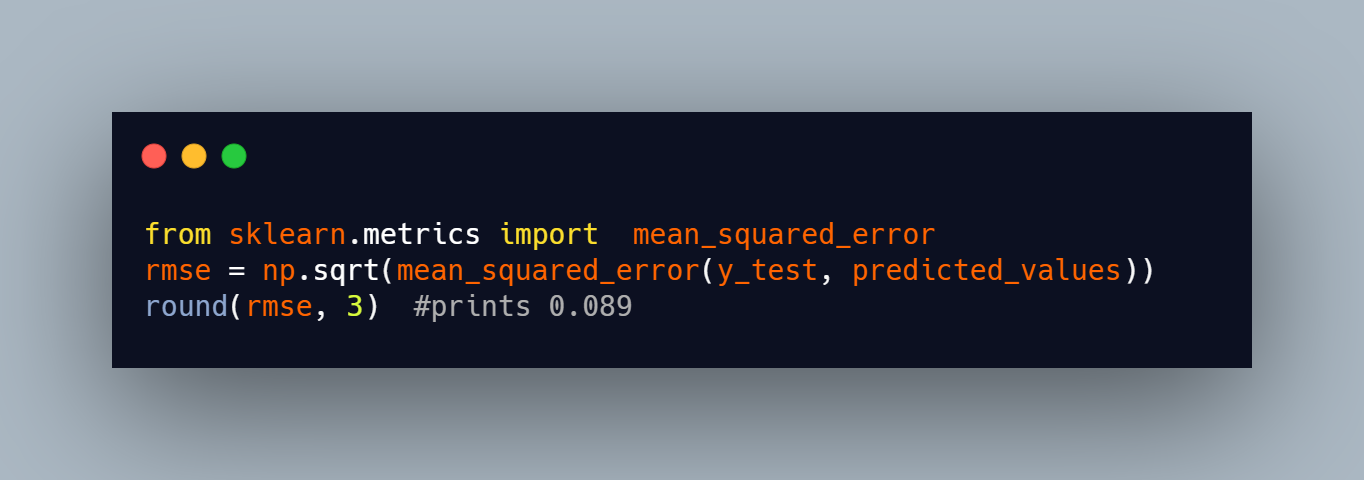

* R-Squared 

Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging from 0 to 1, It gives information on the percentage of the response variable  explained by the model. Mostly, the higher the value, the better the model however, this is not necessarily always true.

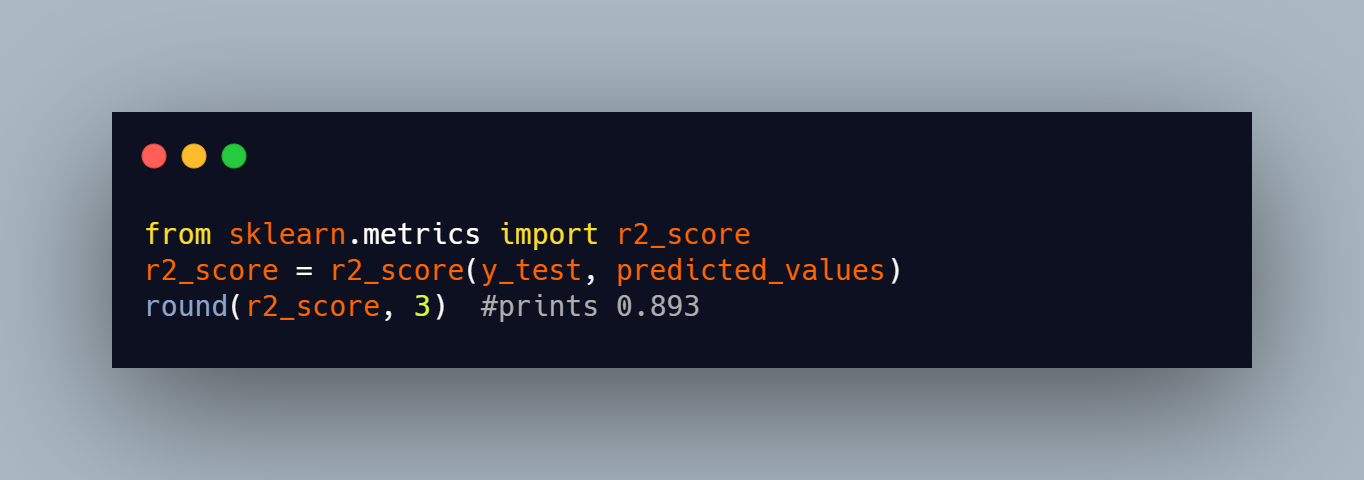

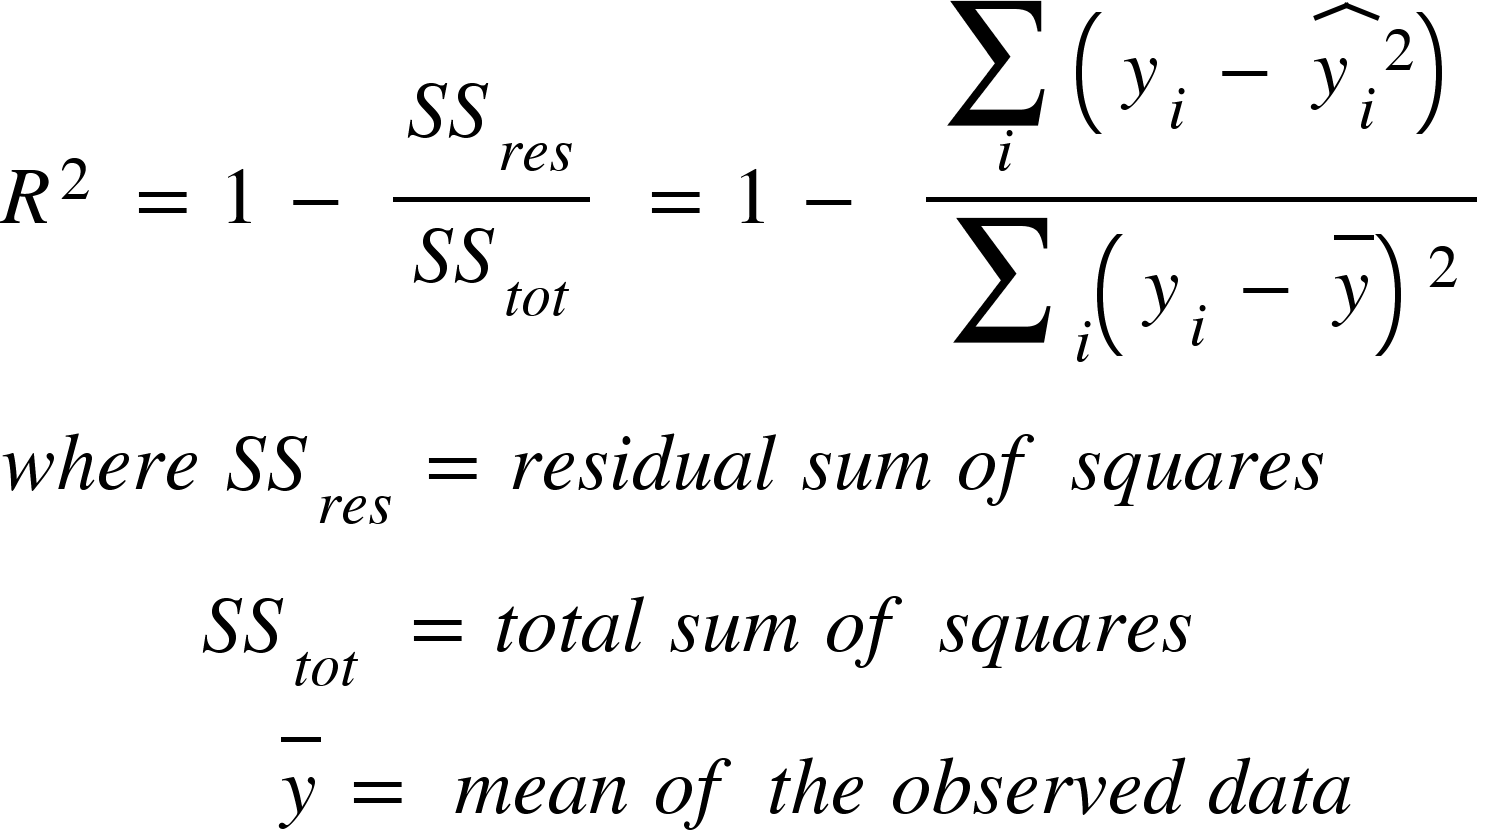

### The Bias-Variance tradeoff

Bias and variance are common occurrences in machine learning and there is a constant struggle to achieve low bias and variance. Bias is a measure of correctness of a model i.e. how far off is a model from being correct? While high bias results in an increase in the error by making assumptions which prevent the model from capturing relevant relationships between the predictors and response variable, low bias gives lower error and also prevents underfitting by capturing important relationships. On the other hand, variance tells how much the values estimated by a model will vary across different training data. When the variance is low, it means that there is only a small change in the estimate of the model with  new training  data. A high variance causes overfitting such that the changes in estimates obtained with new training data is large because the model is so complex that it has now learnt patterns from one training data such that it cannot generalise to other training sets. While it is essential to obtain low bias and low variance, it is almost impossible to achieve this simultaneously which is where the ‘bias-variance tradeoff’ occurs. 

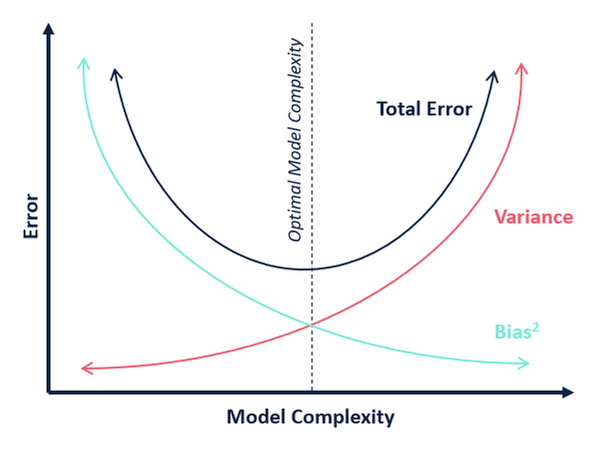

# Penalization Methods

Also known as L2 Regularisation, this is a technique that uses a penalty term to shrink the magnitude of coefficients towards zero without eliminating them. The shrinkage prevents overfitting caused by the complexity of the model or  collinearity. It includes the square magnitude of the coefficients to the loss function as the penalty term.  If the error is defined as the square of residual, when a L2 regularization term is added, the  result is the equation below.
As lambda increases, the penalty increases causing more coefficients to shrink in the same vein, if lambda is zero, it results in the loss function.

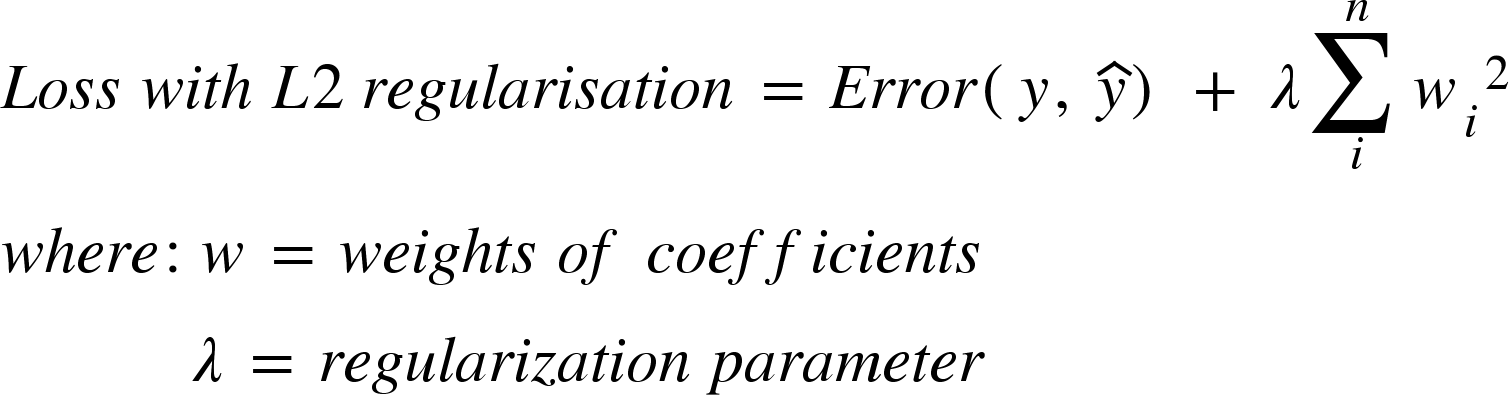

## Feature Selection and Lasso Regression

Some datasets can be high dimensional with a very high number of features and some of them not contributing towards predicting the response variable. As a result, it becomes more computationally expensive to train a model and can also introduce noise causing the model to perform poorly. The process of selecting significant features that contribute the most in obtaining high performing models is known as feature selection. Lasso regression (Least Absolute Shrinkage and Selection Operator) reduces overfitting of the dataset by penalising the coefficients such that some coefficients are shrunk to zero and, indirectly performs feature selection by selecting only a subset of features leaving only relevant variables that minimize prediction errors. By using L1 regularisation, it includes the absolute value of the magnitude to the loss function. The application of L1 regularisation (Lasso regression)  results in simpler and sparse models that allow for better interpretation. Although lasso regression helps prevent overfitting, one major limitation is that it does not consider other factors when eliminating predictors. For example, it arbitrarily  eliminates a variable from a correlated pair which might not be a good rational from a human perspective. When a L1 regularization term is added, the  result is the equation below.
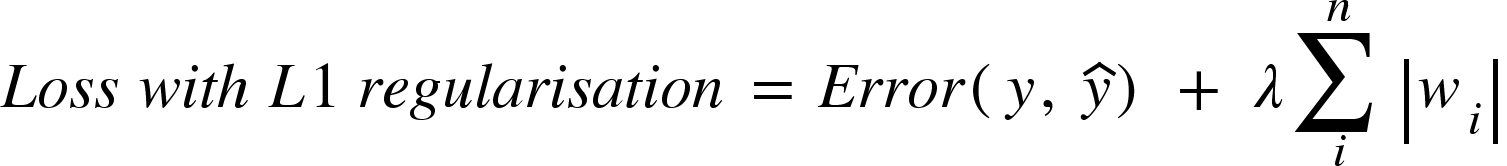

* Elastic Net Regression

This is simply a combination of the L1 and L2 penalties from ridge and lasso regression. This method arose from the need to overcome the limitations of lasso regression. It regularizes and performs feature selection simultaneously by initially finding the optimal values of the coefficients as in ridge then performs a shrinkage.

# Non-Linear Regression Methods and Other Recommendations
* Model Tuning and choosing parameters
Machine learning models are parameterized such that there has to be a search for the combination of parameters that will result in the optimal performance of the model. The parameters that define the model architecture are referred to as hyperparameters while the process of exploring a range of values is called hyperparameter tuning. It is important to note the distinction between model parameters and hyperparameters. Unlike hyperparameters, model parameters are learnt during the training phase while setting hyperparameters is exclusive of the training process. Ideally, when hyperparameter tuning is completed, the result is the best parameters for the model. Grid search and random search are two common strategies for tuning hyperparameters. 

* Grid Search

Grid search explores the combination of a grid of parameters such that for every combination of parameters, a model is built and evaluated then the model with the best result selected and its corresponding parameters. While it is computationally expensive, setting up a grid search is quite easy.

* Random Search

As opposed to grid search, random search randomly combines parameter values in the grid to build and evaluate models. It does not sequentially combine all parameters as in grid search instead, it allows for a quick exploration of the entire action space to reach optimal values.


#### Data splitting, resampling and cross validation strategy
Data splitting in data science involves setting aside a portion of the dataset for testing (out of sample or hold-out) and evaluating the performance of the model to provide unbiased results while the rest is used in fitting the model. The proportion of division is solely based on choice and sometimes, the size of the dataset. However a common practice is to split the dataset into training, validation or dev and testing sets where the validation set is used to tune the hyperparameters to select the best values for the model. Resampling involves repeatedly selecting samples from the original dataset and using these samples to obtain more information about the model. This can create different samples of the training set and another for evaluation. Cross validation is a method used to generalise and prevent overfitting in machine learning